In [253]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

/var/folders/rv/25_n51191438rcq9n5gyvwcm0000gn/T/ipykernel_9749/2709805836.py:33: RuntimeWarning: invalid value encountered in divide
  dN_one = dN_one / vector;
/var/folders/rv/25_n51191438rcq9n5gyvwcm0000gn/T/ipykernel_9749/2709805836.py:34: RuntimeWarning: invalid value encountered in divide
  dN_two = dN_two / vector;


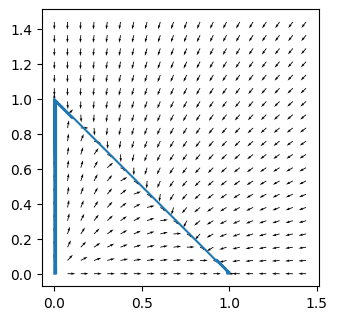

In [254]:
#fig, ax = plt.subplots()
w = 1.5; 
N_one, N_two = np.mgrid[0:w:100j, 0:w:100j]; 
 
B_one = 0.9; 
B_two = 1.1; 

rho = 1.1; 

dN_one = N_one * (1 - N_one - B_one * N_two); 
dN_two = rho * N_two * (1 - N_two - B_two * N_one); 

vector = np.sqrt(pow(dN_one,2) + pow(dN_two,2)); 

x = []; 
y = []; 

for i in np.arange(0,w,0.01):
    for j in np.arange(0,w,0.01):
        bool_one = (i * (1 - i - B_one * j) <= 0.01) and (i * (1 - i - B_one * j) >= -0.01); 
        bool_two = (rho * j * (1 - j - B_two * i) <= 0.01) and (rho * j * (1 - j - B_two * i) >= -0.01);  
        if  bool_one and bool_two:
            x.append(i); 
            y.append(j); 

# making a plot for streamlines
# plt.subplot(1, 2, 1); # putting plots on the same image, this at row 1, col 1, index 1
# plt.streamplot(N_one, N_two, dN_one, dN_two, density = 1, color = "green", linewidth = 0.5); # making streamlines
# plt.gca().set_aspect('equal'); 

# normalizing vectors to make the vector plot prettier

dN_one = dN_one / vector; 
dN_two = dN_two / vector; 

plt.subplot(1, 2, 2);  # putting plots on the same image, this at row 1, col 2, index 1
plt.quiver(N_one[::5, ::5], N_two[::5, ::5], dN_one[::5, ::5], dN_two[::5,::5]); # making vectors, skipping every 5 points
plt.plot(x, y)
plt.gca().set_aspect('equal'); 

plt.tight_layout()
plt.show()



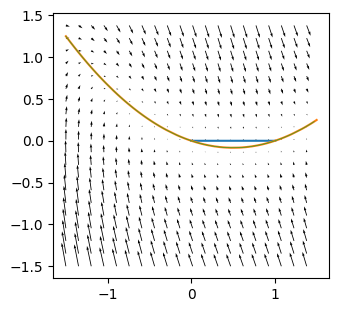

In [255]:
w = 1.5; 
f, g = np.mgrid[-w:w:100j, -w:w:100j]; 

d_f = g; 

c = 3;  
d_g = -c * g - f * (1 - f); 

x = []; 
y = []; 
u = []; 
v = []; 
for i in np.arange(-w,w,0.001):
    for j in np.arange(-w,w,0.001):
        d_x = j; 
        d_y = -c * j - i * (1 - i); 
        bool_one = (d_x <= 0.001) and (d_x >= -0.001); 
        bool_two = (d_y <= 0.001) and (d_y >= -0.001);  
        if(bool_one and bool_two):
            x = np.append(x, i); 
            y = np.append(y, j); 
        if(bool_two):
            u = np.append(u, i); 
            v = np.append(v, j); 
            

vector = np.sqrt(1 + pow((pow(f,2) + pow(g,2) - 1), 2)); 

xaxis = np.arange(-w, w, 2 * w / 100)
yaxis = np.arange(-w, w, 2 * w / 100)

z = -(1 / c) * xaxis * (1 - xaxis)

# making a plot for streamlines
# plt.subplot(1, 2, 1); # putting plots on the same image, this at row 1, col 1, index 1
# plt.streamplot(xaxis, yaxis, d_f, d_g, density = 1, color = "green", linewidth = 0.5); # making streamlines
# plt.gca().set_aspect('equal'); 

plt.subplot(1, 2, 2);  # putting plots on the same image, this at row 1, col 2, index 1
plt.quiver(f[::5, ::5], g[::5, ::5], d_f[::5, ::5], d_g[::5, ::5]); # making vectors, skipping every 5 points
plt.plot(x, y); 
plt.plot(u, v); 
plt.plot(xaxis, z, linewidth = 0.5); 
plt.gca().set_aspect('equal'); 

plt.tight_layout()
plt.show()
